# Part 3: Phase plane
# 03A. Nullclines

### Mingyang Lu

### 1/5/2024

##  A two-variable toggle switch circuit

\begin{cases} \frac{dX}{dt} = g_{X0} + g_{X1}\frac{1}{1+(Y/Y_{th})^{n_Y}} - k_XX \\
              \frac{dY}{dt} = g_{Y0} + g_{Y1}\frac{1}{1+(X/X_{th})^{n_X}} - k_YY \end{cases}

In [1]:
def hill_inh(X, X_th, n):
    # inhibitory Hill function
    # X_th: Hill threshold, n: Hill coefficient
    a = (X / X_th)**n
    return 1 / (1 + a)

def derivs_ts(t, Xs):
    # Calculate derivative function for a toggle switch circuit
    X = Xs[0]
    Y = Xs[1]
    dxdt = 5 + 50 * hill_inh(Y, 100, 4) - 0.1 * X
    dydt = 4 + 40 * hill_inh(X, 150, 4) - 0.12 * Y
    return [dxdt, dydt]

ODE simulations for a multi-variable system. The following implementation is a slightly modified version of the RK4 ODE integrator. It works for a multiple varaible system by using vector operations. We perform ODE simulations from 10 differemt initial conditions

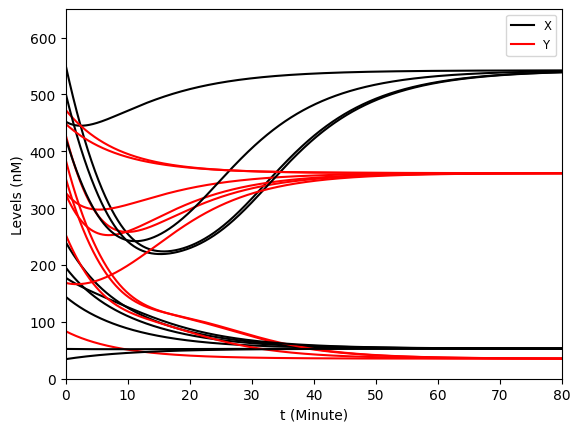

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 4th order Runge-Kutta (RK4) for a generic multi-variable system
def RK4_generic(derivs, X0, t_total, dt, **kwargs):
    # derivs: the function of the derivatives
    # X0: initial condition, a list of multiple variables
    # t_total: total simulation time, assuming t starts from 0 at the beginning
    # dt: time step size
    t_all = np.arange(0, t_total + dt, dt)
    n_all = len(t_all)
    nx = len(X0)
    X_all = np.zeros((n_all, nx))
    X_all[0, :] = X0
    for i in range(n_all - 1):
        t_0 = t_all[i]
        t_0_5 = t_0 + 0.5 * dt
        t_1 = t_0 + dt
        k1 = dt * np.array(derivs(t_0, X_all[i, :], **kwargs))
        k2 = dt * np.array(derivs(t_0_5, X_all[i, :] + k1 / 2, **kwargs))
        k3 = dt * np.array(derivs(t_0_5, X_all[i, :] + k2 / 2, **kwargs))
        k4 = dt * np.array(derivs(t_1, X_all[i, :] + k3, **kwargs))
        X_all[i + 1, :] = X_all[i, :] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return np.column_stack((t_all, X_all))

# set the seed for the random number generator
np.random.seed(77)
X_init_all = np.random.uniform(0, 600, (10, 2))  # generate 10 random initial conditions

t_total = 100
dt = 0.01
plt.figure()
plt.xlabel("t (Minute)")
plt.ylabel("Levels (nM)")
plt.xlim(0, 80)
plt.ylim(0, 650)
for i in range(X_init_all.shape[0]):
    results = RK4_generic(derivs_ts, X_init_all[i, :], t_total, dt)
    plt.plot(results[:, 0], results[:, 1], label="X" if i == 0 else "", color="black")
    plt.plot(results[:, 0], results[:, 2], label="Y" if i == 0 else "", color="red")

plt.legend(loc="upper right", fontsize="small")
plt.show()

### Phase plane 

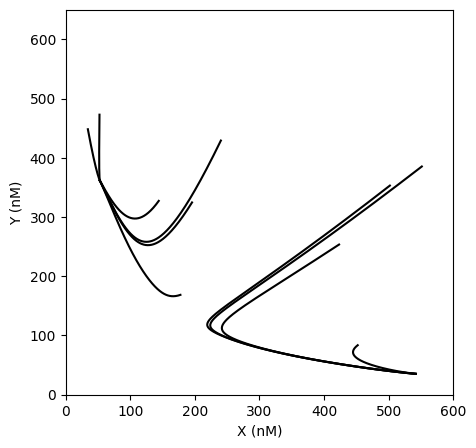

In [3]:
plt.figure(figsize=(5, 5))  # Adjust the figure size to maintain a 1:1 aspect ratio
plt.xlabel("X (nM)")
plt.ylabel("Y (nM)")
plt.xlim(0, 600)
plt.ylim(0, 650)

for i in range(X_init_all.shape[0]):
    results = RK4_generic(derivs_ts, X_init_all[i, :], t_total, dt)
    plt.plot(results[:, 1], results[:, 2], color="black")

plt.show()

### Vector field

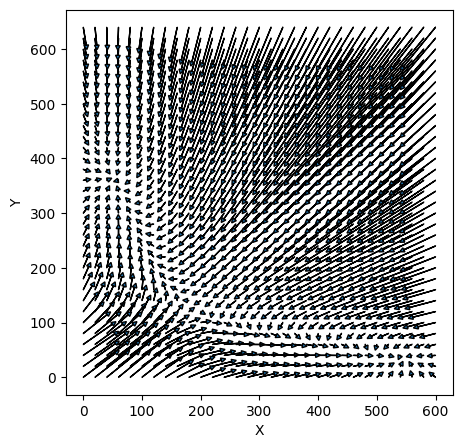

In [4]:
X_all = np.arange(0, 601, 20)  # all X grids
Y_all = np.arange(0, 651, 20)  # all Y grids
XY_all = np.array(np.meshgrid(X_all, Y_all)).T.reshape(-1, 2)  # all combinations of X and Y
# reshape(-1, 2) reshapes the array into a 2D array with 2 columns
# "-1" is a placeholder for an unknown dimension

def generate_vector_field(Xs):
    X, Y = Xs
    dX, dY = derivs_ts(0, Xs)
    return [X, Y, dX, dY]

# apply a function along the specified axis of a 1-D or 2-D array (similar to apply in R)
results = np.apply_along_axis(generate_vector_field, 1, XY_all)

plt.figure(figsize=(5, 5))
for i in range(len(results)):
    plt.arrow(results[i, 0], results[i, 1], results[i, 2], results[i, 3],
                          head_width=8, head_length=8, ec='black')

plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Unit vector field

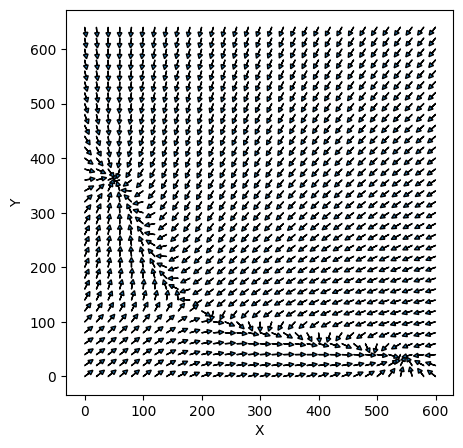

In [5]:
def generate_normalized_vector_field(Xs):
    X, Y = Xs
    dX, dY = derivs_ts(0, Xs)
    dX_norm = dX/np.sqrt(dX**2 + dY**2)
    dY_norm = dY/np.sqrt(dX**2 + dY**2)
    return [X, Y, 10*dX_norm, 10*dY_norm]

results_unit = np.apply_along_axis(generate_normalized_vector_field, 1, XY_all)

plt.figure(figsize=(5, 5))
for i in range(len(results_unit)):
    plt.arrow(results_unit[i, 0], results_unit[i, 1], results_unit[i, 2], results_unit[i, 3],
              head_width=8, head_length=8, ec='black')

plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Nullclines

1. Separation of variables

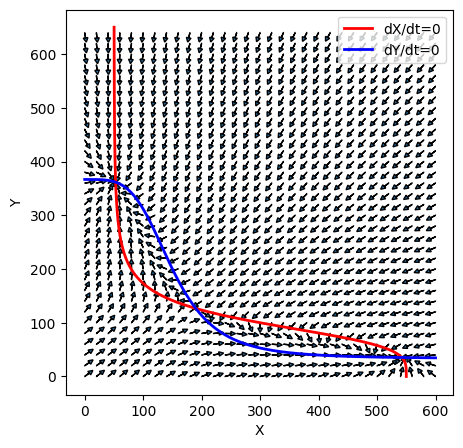

In [6]:
X_all = np.arange(0, 601, 1)   # all X grids
Y_all = np.arange(0, 651, 1)   # all Y grids

def nullcline1(Y):
    X = (5 + 50 * hill_inh(Y, 100, 4)) / 0.1
    return np.column_stack((X, Y))

def nullcline2(X):
    Y = (4 + 40 * hill_inh(X, 150, 4)) / 0.12
    return np.column_stack((X, Y))

null1 = nullcline1(Y_all)
null2 = nullcline2(X_all)

plt.figure(figsize=(5, 5))
# Plot unit vector field
for i in range(len(results_unit)):
    plt.arrow(results_unit[i, 0], results_unit[i, 1], results_unit[i, 2], results_unit[i, 3],
              head_width=8, head_length=8, ec='black')
# Plot nullclines
plt.plot(null1[:, 0], null1[:, 1], color='red', label='dX/dt=0', linewidth=2)
plt.plot(null2[:, 0], null2[:, 1], color='blue', label='dY/dt=0', linewidth=2)

plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='upper right')
plt.show()

2. Contour method

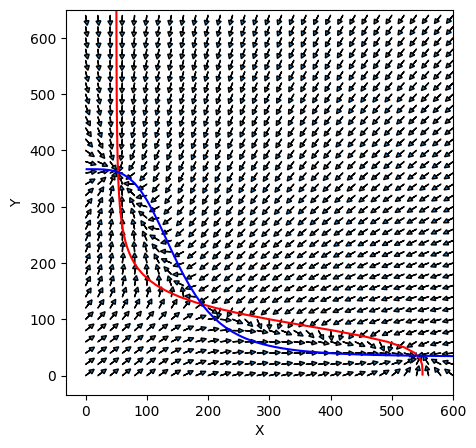

In [7]:
X_all = np.arange(0, 601, 10)
Y_all = np.arange(0, 651, 10)
nX = len(X_all)
nY = len(Y_all)

# Create a meshgrid of X and Y values
X, Y = np.meshgrid(X_all, Y_all)

# Generate vector field data
results = np.apply_along_axis(lambda Xs: np.concatenate([Xs, derivs_ts(0, Xs)]), 
                              1, np.column_stack((X.ravel(), Y.ravel())))
z_X = results[:, 2].reshape((nY, nX))  # Note the transposition to match the shape of meshgrid
z_Y = results[:, 3].reshape((nY, nX))


plt.figure(figsize=(5, 5))
# Plot unit vector field
for i in range(len(results_unit)):
    plt.arrow(results_unit[i, 0], results_unit[i, 1], results_unit[i, 2], results_unit[i, 3],
              head_width=8, head_length=8, ec='black')
# Plot contour for z_X (x-nullcline)
contour_plot_X = plt.contour(X, Y, z_X, levels=[0], colors='red')

# Plot contour for z_Y (y-nullcline)
contour_plot_Y = plt.contour(X, Y, z_Y, levels=[0], colors='blue')

plt.xlabel("X")
plt.ylabel("Y")
plt.show()

3. Numerical continuation
   (Omitted. Check Part 02E for a similar usage in generating bifurcation diagram)

Finally, save nullcline data (two matrices) to data file.

In [8]:
# Save the matrix to a CSV file
np.savetxt("null1_03A.csv", null1, delimiter=',')
np.savetxt("null2_03A.csv", null2, delimiter=',')